# **EMOTION DETECTION**

* Loading the dataset containing emotional text descriptions.
* Exploring the first five rows of the dataset.

In [2]:
import warnings
warnings.filterwarnings('ignore'
import os)
import numpy as np
import pandas as pd

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/emotions-dataset-for-nlp/val.txt
/kaggle/input/emotions-dataset-for-nlp/test.txt
/kaggle/input/emotions-dataset-for-nlp/train.txt


In [3]:
df = pd.read_csv("/kaggle/input/emotions-dataset-for-nlp/train.txt",sep=";",
    names=["Description","Emotion"])
df.head(5)

,Description,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


# **DATA PRE-PROCESSING**

* Checking the distribution of emotions in the dataset.
* Mapping emotions to numerical labels.
* Splitting the dataset into training and testing sets.
* Visualizing the class distribution of emotions in a countplot.

In [4]:
df['Emotion'].value_counts()

Emotion
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

In [5]:
df['label_num'] = df['Emotion'].map({
    'joy' : 0, 
    'sadness': 1, 
    'anger': 2, 
    'fear': 3,
    'love': 4,
    'surprise':5
})

df.head(5)

,Description,Emotion,label_num
0,i didnt feel humiliated,sadness,1
1,i can go from feeling so hopeless to so damned...,sadness,1
2,im grabbing a minute to post i feel greedy wrong,anger,2
3,i am ever feeling nostalgic about the fireplac...,love,4
4,i am feeling grouchy,anger,2


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.Description,df.label_num,test_size=0.2)

In [7]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (12800,)
Shape of X_test:  (3200,)


In [8]:
y_train.value_counts()

label_num
0    4301
1    3735
2    1734
3    1532
4    1044
5     454
Name: count, dtype: int64

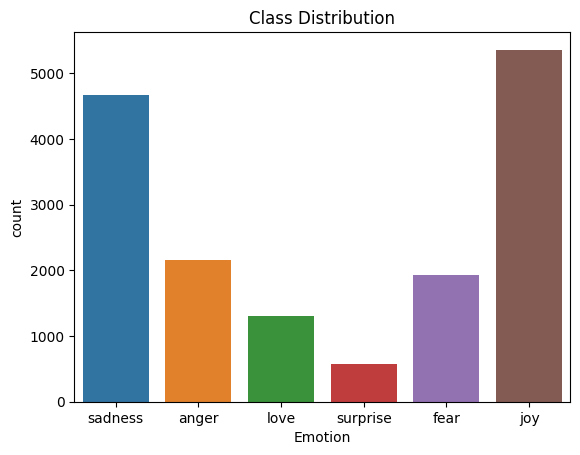

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Emotion', data=df)
plt.title('Class Distribution')
plt.show()


# **TEXT PRE PROCESSING**

* Applying text pre-processing using spaCy to clean and tokenize the text.
* Creating a new column for processed text.

In [10]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [11]:
def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        else:
            filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)

In [ ]:
df['processed_text'] = df["Description"].apply(preprocess)

In [ ]:
df

# **WORD CLOUD VISUALIZATION**

* Generating word clouds for each emotion to visualize the most frequent words

In [ ]:
from wordcloud import WordCloud

emotions = df['Emotion'].unique()
for emotion in emotions:
    text = " ".join(df[df['Emotion'] == emotion]['processed_text'])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {emotion}')
    plt.axis('off')
    plt.show()


# **MODEL TRAINING**

* Training the model on the pre-processed text data.
* Evaluating the model on the test set.

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.utils import to_categorical

# Load the dataset
df = pd.read_csv("/kaggle/input/emotions-dataset-for-nlp/train.txt", sep=";", names=["Description", "Emotion"])

# Data preprocessing
le = LabelEncoder()
df['label_num'] = le.fit_transform(df['Emotion'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['Description'], df['label_num'], test_size=0.2, random_state=2022, stratify=df['label_num'])

# Tokenize the text
max_words = 5000  # Adjust this based on your data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences for consistent length
max_sequence_length = 100  # Adjust this based on your data
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Convert labels to categorical
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# **SIMPLE RNN**

* Building a Simple RNN model for emotion detection.
* Compiling the model with categorical crossentropy loss and Adam optimizer.
* Displaying a confusion matrix and classification report.
* Plotting the training history (accuracy and validation accuracy).

In [16]:
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
embedding_dim = 100  # Adjust this based on your data
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(SimpleRNN(100, activation='relu'))
model.add(Dense(6, activation='softmax'))  # Assuming you have 6 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history2=model.fit(X_train_pad, y_train_categorical, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
loss_simple_rnn, accuracy_simple_rnn = model.evaluate(X_test_pad, y_test_categorical)
print(f"Simple RNN - Test Loss: {loss_simple_rnn}, Test Accuracy: {accuracy_simple_rnn}")


160/160 [==============================] - 15s 95ms/step - loss: 0.9637 - accuracy: 0.6392 - val_loss: 0.7453 - val_accuracy: 0.7063
Epoch 3/10
160/160 [==============================] - 12s 73ms/step - loss: 0.5520 - accuracy: 0.7803 - val_loss: 0.6161 - val_accuracy: 0.7762
Epoch 4/10
160/160 [==============================] - 13s 81ms/step - loss: 0.4137 - accuracy: 0.8543 - val_loss: 0.4623 - val_accuracy: 0.8566
Epoch 5/10
160/160 [==============================] - 11s 68ms/step - loss: 0.1733 - accuracy: 0.9381 - val_loss: 0.4286 - val_accuracy: 0.8801
Epoch 7/10
160/160 [==============================] - 11s 70ms/step - loss: 0.1569 - accuracy: 0.9521 - val_loss: 0.5020 - val_accuracy: 0.8445
Epoch 8/10
160/160 [==============================] - 11s 67ms/step - loss: 0.1290 - accuracy: 0.9597 - val_loss: 0.4245 - val_accuracy: 0.8734
Epoch 9/10
160/160 [==============================] - 11s 67ms/step - loss: 0.0650 - accuracy: 0.9808 - val_loss: 0.3653 - val_accuracy: 0.8996
Epo

100/100 [==============================] - 1s 8ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       432
           1       0.85      0.86      0.86       387
           2       0.93      0.91      0.92      1072
           3       0.69      0.79      0.73       261
           4       0.94      0.95      0.95       933
           5       0.70      0.63      0.66       115

    accuracy                           0.89      3200
   macro avg       0.84      0.84      0.84      3200
weighted avg       0.89      0.89      0.89      3200

Confusion Matrix:
[[385  18  10   6   9   4]
 [ 14 333   4   8  12  16]
 [ 11   6 971  62  19   3]
 [  2   2  41 205   8   3]
 [ 12  11  10   6 889   5]
 [  2  21   5  11   4  72]]


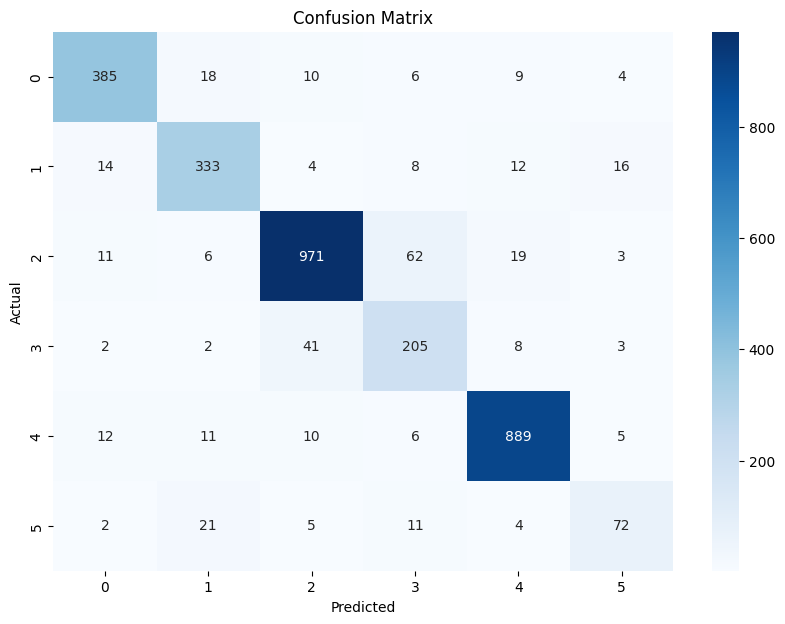

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test_classes, y_pred_classes))

    # Confusion Matrix
    cm = confusion_matrix(y_test_classes, y_pred_classes)
    print("Confusion Matrix:")
    print(cm)

    # Plot Confusion Matrix
    plt.figure(figsize=(10, 7))
    sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3, 4, 5], yticklabels=[0, 1, 2, 3, 4, 5])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming you have X_test_pad and y_test_categorical
evaluate_model(model, X_test_pad, y_test_categorical)


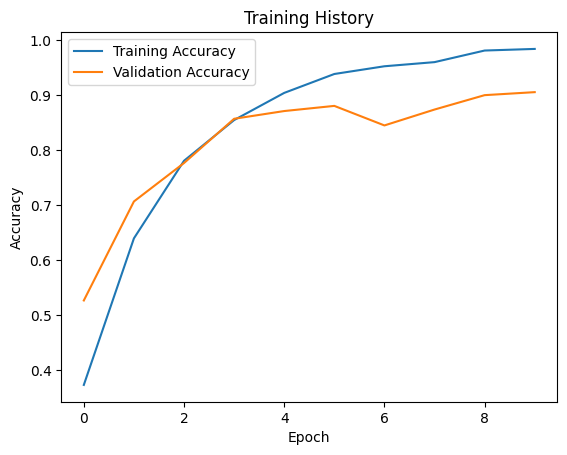

In [18]:
# Plot training history
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# **LSTM**

* Building an LSTM model for emotion detection.
* Compiling and training the LSTM model.
* Evaluating the LSTM model on the test set.
* Displaying a confusion matrix and classification report.
* Plotting the training history for the LSTM model.

In [19]:
# Build the RNN model
embedding_dim = 100  # Adjust this based on your data
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(100, activation='relu'))
model.add(Dense(6, activation='softmax'))  # Assuming you have 6 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model

history1 = model.fit(X_train_pad, y_train_categorical, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the LSTM model
loss_lstm, accuracy_lstm = model.evaluate(X_test_pad, y_test_categorical)
print(f"LSTM - Test Loss: {loss_lstm}, Test Accuracy: {accuracy_lstm}")


Epoch 1/10
160/160 [==============================] - 27s 159ms/step - loss: 2295872.5000 - accuracy: 0.3254 - val_loss: 1.6327 - val_accuracy: 0.3723
Epoch 2/10
160/160 [==============================] - 18s 114ms/step - loss: 4.5571 - accuracy: 0.4165 - val_loss: 1.5848 - val_accuracy: 0.4117
Epoch 3/10
160/160 [==============================] - 15s 94ms/step - loss: 1.6601 - accuracy: 0.5078 - val_loss: 1.5149 - val_accuracy: 0.5293
Epoch 4/10
160/160 [==============================] - 14s 88ms/step - loss: 1.3918 - accuracy: 0.5862 - val_loss: 1.9115 - val_accuracy: 0.5590
Epoch 5/10
160/160 [==============================] - 14s 88ms/step - loss: 1.6348 - accuracy: 0.6187 - val_loss: 1.3298 - val_accuracy: 0.5727
Epoch 6/10
160/160 [==============================] - 15s 91ms/step - loss: 1.2174 - accuracy: 0.6483 - val_loss: 1.2173 - val_accuracy: 0.5922
Epoch 7/10
160/160 [==============================] - 15s 92ms/step - loss: 1.0830 - accuracy: 0.6798 - val_loss: 1.1611 - val_a

100/100 [==============================] - 1s 13ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.52      0.62       432
           1       0.75      0.43      0.55       387
           2       0.65      0.82      0.72      1072
           3       1.00      0.00      0.01       261
           4       0.58      0.83      0.69       933
           5       0.00      0.00      0.00       115

    accuracy                           0.64      3200
   macro avg       0.63      0.43      0.43      3200
weighted avg       0.67      0.64      0.59      3200



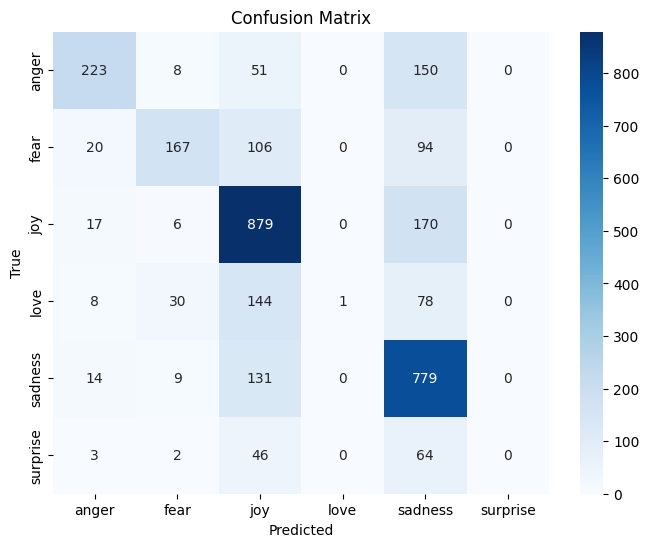

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Function to evaluate and visualize the model performance
def evaluate_model(model, X_test_pad, y_test_categorical):
    # Make predictions
    y_pred = model.predict(X_test_pad)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test_categorical, axis=1)

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_true_classes, y_pred_classes))

    # Generate confusion matrix
    cm = confusion_matrix(y_true_classes, y_pred_classes)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Evaluate the first LSTM model
evaluate_model(model, X_test_pad, y_test_categorical)


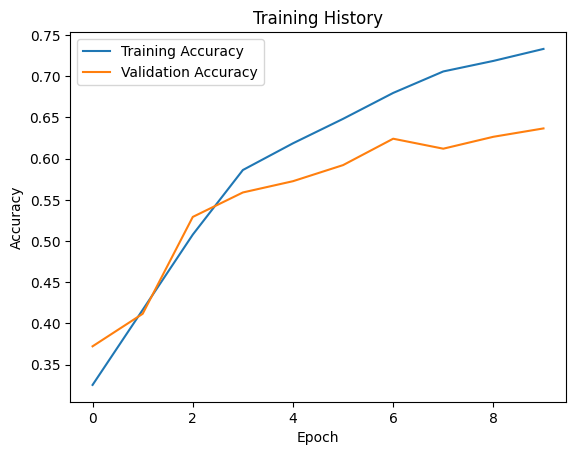

In [21]:
# Plot training history
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# **MODEL COMPARISON**

* Comparing the test accuracies of the Simple RNN and LSTM models using a bar plot.

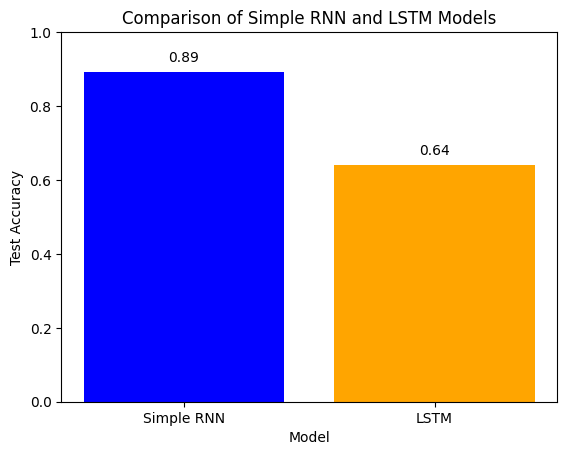

In [22]:
import matplotlib.pyplot as plt

# Define model names and test accuracies
model_names = ['Simple RNN', 'LSTM']
test_accuracies = [accuracy_simple_rnn, accuracy_lstm]

# Create a bar plot
plt.bar(model_names, test_accuracies, color=['blue', 'orange'])
plt.ylim(0, 1)  # Set the y-axis limit between 0 and 1 for accuracy

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Simple RNN and LSTM Models')

# Display the test accuracies on top of the bars
for i, accuracy in enumerate(test_accuracies):
    plt.text(i, accuracy + 0.02, f'{accuracy:.2f}', ha='center', va='bottom')

# Show the plot
plt.show()


# **PREDICTION**

* Defining a function to predict emotions using the model.
* Making predictions on sample sentences using the trained model.

In [23]:
def predict_emotion_rnn(sentence):
    processed_sentence = preprocess(sentence)
    sequence = tokenizer.texts_to_sequences([processed_sentence])
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length)
    prediction = model.predict(padded_sequence)
    predicted_emotion = le.inverse_transform([prediction.argmax()])
    return predicted_emotion[0]

# Sample sentences for prediction
sentences_to_predict = [
    "I feel so happy right now.",
    "This situation makes me angry.",
    "I am in love with this idea.",
    "Feeling a bit anxious about the presentation.",
    "The surprise party was amazing!",
    "I can't believe you said that. It's so rude."
]

# Predict emotions for each sentence
for sentence in sentences_to_predict:
    predicted_emotion = predict_emotion_rnn(sentence)
    print(f"The predicted emotion for the sentence is: {predicted_emotion}")



1/1 [==============================] - 0s 214ms/step
The predicted emotion for the sentence is: joy
1/1 [==============================] - 0s 33ms/step
The predicted emotion for the sentence is: anger
1/1 [==============================] - 0s 32ms/step
The predicted emotion for the sentence is: joy
1/1 [==============================] - 0s 33ms/step
The predicted emotion for the sentence is: fear
1/1 [==============================] - 0s 33ms/step
The predicted emotion for the sentence is: sadness
1/1 [==============================] - 0s 33ms/step
The predicted emotion for the sentence is: anger
